# Problem Statement :- 
### Analyze traffic accident data to identify patterns related to road conditions, weather, and time of day. Visualize accident hotspots and contributing factors.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_excel("Road Accident Data.xlsx")
df

,Accident_Index,Accident Date,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Carriageway_Hazards,...,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,BS0000001,2021-01-01,Thursday,Give way or uncontrolled,T or staggered junction,Serious,51.512273,Daylight,Kensington and Chelsea,None,...,1,2,Metropolitan Police,Dry,One way street,30,15:11:00,Urban,Fine no high winds,Car
1,BS0000002,2021-01-05,Monday,Give way or uncontrolled,Crossroads,Serious,51.514399,Daylight,Kensington and Chelsea,None,...,11,2,Metropolitan Police,Wet or damp,Single carriageway,30,10:59:00,Urban,Fine no high winds,Taxi/Private hire car
2,BS0000003,2021-01-04,Sunday,Give way or uncontrolled,T or staggered junction,Slight,51.486668,Daylight,Kensington and Chelsea,None,...,1,2,Metropolitan Police,Dry,Single carriageway,30,14:19:00,Urban,Fine no high winds,Taxi/Private hire car
3,BS0000004,2021-01-05,Monday,Auto traffic signal,T or staggered junction,Serious,51.507804,Daylight,Kensington and Chelsea,None,...,1,2,Metropolitan Police,Frost or ice,Single carriageway,30,08:10:00,Urban,Other,Motorcycle over 500cc
4,BS0000005,2021-01-06,Tuesday,Auto traffic signal,Crossroads,Serious,51.482076,Darkness - lights lit,Kensington and Chelsea,None,...,1,2,Metropolitan Police,Dry,Single carriageway,30,17:25:00,Urban,Fine no high winds,Car
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307968,BS0307969,2022-02-18,Thursday,Data missing or out of range,Not at junction or within 20 metres,Slight,57.374005,Daylight,Highland,None,...,2,1,Northern,Dry,Single carriageway,60,07:00:00,Rural,Fine no high winds,Car
307969,BS0307970,2022-02-21,Sunday,Data missing or out of range,Not at junction or within 20 metres,Slight,57.232273,Darkness - no lighting,Highland,None,...,1,1,Northern,Frost or ice,Single carriageway,60,03:00:00,Rural,Fine no high winds,Car
307970,BS0307971,2022-02-23,Tuesday,Give way or uncontrolled,T or staggered junction,Slight,57.585044,Daylight,Highland,None,...,1,3,Northern,Frost or ice,Single carriageway,30,09:38:00,Rural,Fine no high winds,Car
307971,BS0307972,2022-02-23,Tuesday,Give way or uncontrolled,T or staggered junction,Serious,57.214898,Darkness - no lighting,Highland,None,...,1,2,Northern,Wet or damp,Single carriageway,60,18:25:00,Rural,Fine no high winds,Motorcycle over 500cc


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307973 entries, 0 to 307972
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Accident_Index              307973 non-null  object        
 1   Accident Date               307973 non-null  datetime64[ns]
 2   Day_of_Week                 307973 non-null  object        
 3   Junction_Control            307973 non-null  object        
 4   Junction_Detail             307973 non-null  object        
 5   Accident_Severity           307973 non-null  object        
 6   Latitude                    307973 non-null  float64       
 7   Light_Conditions            307973 non-null  object        
 8   Local_Authority_(District)  307973 non-null  object        
 9   Carriageway_Hazards         307970 non-null  object        
 10  Longitude                   307973 non-null  float64       
 11  Number_of_Casualties        307973 non-

In [4]:
df.isnull().sum()

Accident_Index                 0
Accident Date                  0
Day_of_Week                    0
Junction_Control               0
Junction_Detail                0
Accident_Severity              0
Latitude                       0
Light_Conditions               0
Local_Authority_(District)     0
Carriageway_Hazards            3
Longitude                      0
Number_of_Casualties           0
Number_of_Vehicles             0
Police_Force                   0
Road_Surface_Conditions        0
Road_Type                      0
Speed_limit                    0
Time                          17
Urban_or_Rural_Area            0
Weather_Conditions             0
Vehicle_Type                   0
dtype: int64

In [5]:
df.columns

Index(['Accident_Index', 'Accident Date', 'Day_of_Week', 'Junction_Control',
       'Junction_Detail', 'Accident_Severity', 'Latitude', 'Light_Conditions',
       'Local_Authority_(District)', 'Carriageway_Hazards', 'Longitude',
       'Number_of_Casualties', 'Number_of_Vehicles', 'Police_Force',
       'Road_Surface_Conditions', 'Road_Type', 'Speed_limit', 'Time',
       'Urban_or_Rural_Area', 'Weather_Conditions', 'Vehicle_Type'],
      dtype='object')

## Drop col which are not useful for my analysis
- 'Accident_Index'
- 'Junction_Control'
- 'Carriageway_Hazards'
- 'Police_Force'
- 'Number_of_Vehicles'

In [6]:
df.drop(columns=['Accident_Index','Junction_Control' , 'Carriageway_Hazards','Police_Force' ,'Number_of_Vehicles' ,"Speed_limit"] , inplace=True)

### Work on Accident Date col 

In [7]:
df["Accident Date"]

0        2021-01-01
1        2021-01-05
2        2021-01-04
3        2021-01-05
4        2021-01-06
            ...    
307968   2022-02-18
307969   2022-02-21
307970   2022-02-23
307971   2022-02-23
307972   2022-02-28
Name: Accident Date, Length: 307973, dtype: datetime64[ns]

### Make Year and Month col as a seperate col 


In [8]:
year = df["Accident Date"].dt.year

In [9]:
month_no = df["Accident Date"].dt.month

In [10]:
month_name = df["Accident Date"].dt.month_name().str[:3]

In [11]:
df.insert(1,"Month_No" ,month_no)
df.insert(2,"Month_Name" ,month_name)
df.insert(3,"Year" ,year)

In [12]:
df.drop(columns="Accident Date" , inplace=True)

In [13]:
df.head()

,Month_No,Month_Name,Year,Day_of_Week,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Longitude,Number_of_Casualties,Road_Surface_Conditions,Road_Type,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,1,Jan,2021,Thursday,T or staggered junction,Serious,51.512273,Daylight,Kensington and Chelsea,-0.201349,1,Dry,One way street,15:11:00,Urban,Fine no high winds,Car
1,1,Jan,2021,Monday,Crossroads,Serious,51.514399,Daylight,Kensington and Chelsea,-0.199248,11,Wet or damp,Single carriageway,10:59:00,Urban,Fine no high winds,Taxi/Private hire car
2,1,Jan,2021,Sunday,T or staggered junction,Slight,51.486668,Daylight,Kensington and Chelsea,-0.179599,1,Dry,Single carriageway,14:19:00,Urban,Fine no high winds,Taxi/Private hire car
3,1,Jan,2021,Monday,T or staggered junction,Serious,51.507804,Daylight,Kensington and Chelsea,-0.203110,1,Frost or ice,Single carriageway,08:10:00,Urban,Other,Motorcycle over 500cc
4,1,Jan,2021,Tuesday,Crossroads,Serious,51.482076,Darkness - lights lit,Kensington and Chelsea,-0.173445,1,Dry,Single carriageway,17:25:00,Urban,Fine no high winds,Car


### Columns name which are contributing in Road Condition pattern
- Junction_Detail
- Road_Type

### Perform EDA on this columns 

In [14]:
df["Junction_Detail"].value_counts()

Not at junction or within 20 metres    123094
T or staggered junction                 96718
Crossroads                              29948
Roundabout                              27264
Private drive or entrance               10875
Other junction                           8315
Slip road                                4265
More than 4 arms (not roundabout)        4148
Mini-roundabout                          3346
Name: Junction_Detail, dtype: int64

#### make Roundabout and Mini-roundabout as a same value inside the dataset 

In [15]:
df["Junction_Detail"] = df["Junction_Detail"].str.replace("Mini-roundabout" ,"Roundabout")

<Axes: >

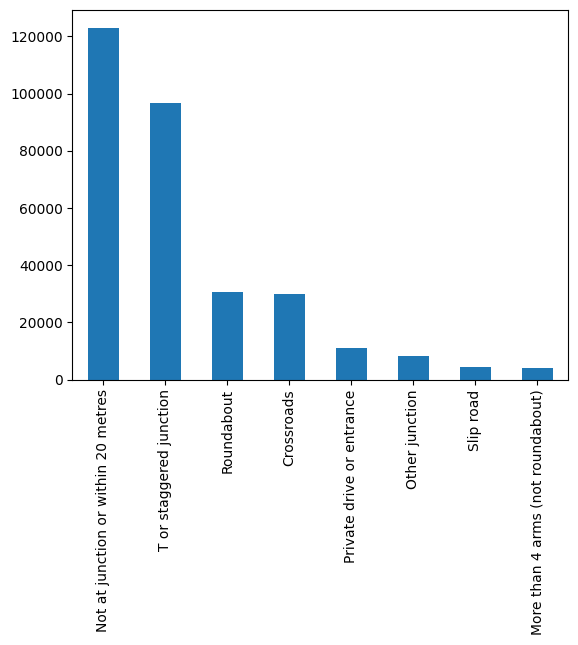

In [16]:
df["Junction_Detail"].value_counts().plot(kind = "bar")

<Axes: ylabel='Density'>

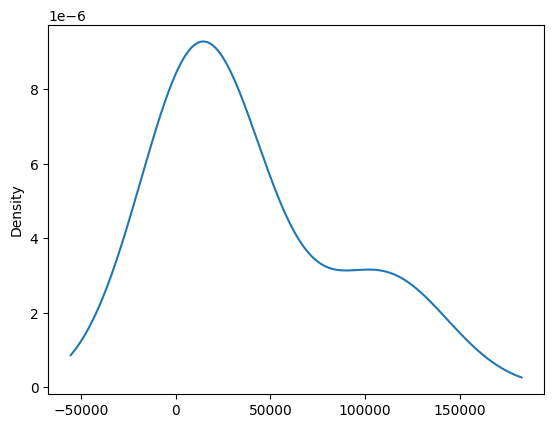

In [17]:
df["Junction_Detail"].value_counts().plot(kind = "kde")

In [18]:
df["Junction_Detail"].value_counts().values

array([123094,  96718,  30610,  29948,  10875,   8315,   4265,   4148],
      dtype=int64)

In [19]:
s = pd.Series([123094,  96718,  30610,  29948,  10875,   8315,   4265,   4148])
s.skew()

1.3300438844879408

## CONCLUSION :- 
- More no.of (123094) accident are happens Not at junction or within 20 metres
- Distribution is Positively skewed 


In [20]:
df["Road_Type"].value_counts()

Single carriageway    230612
Dual carriageway       45467
Roundabout             20929
One way street          6197
Slip road               4768
Name: Road_Type, dtype: int64

<Axes: >

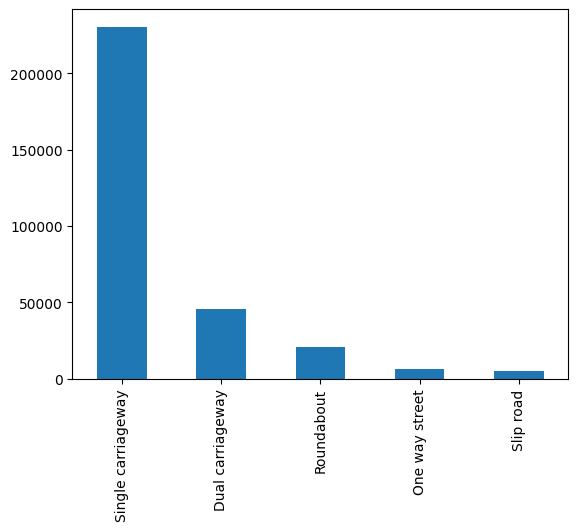

In [21]:
df["Road_Type"].value_counts().plot(kind ="bar")

<Axes: ylabel='Density'>

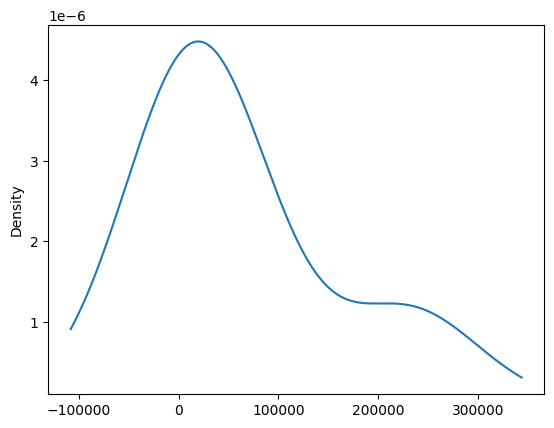

In [22]:
df["Road_Type"].value_counts().plot(kind ="kde")

In [23]:
df["Road_Type"].value_counts().values

array([230612,  45467,  20929,   6197,   4768], dtype=int64)

In [24]:
s = pd.Series([230612,  45467,  20929,   6197,   4768])
s.skew()

2.080961676687285

## CONCLUSION :- 
- More no.of (230612) accident are happens Single carriageway roads
- Distribution is Positively skewed 


### Columns name which are contributing in weather conditionss 
- Light_Conditions
- Road_Surface_Conditions
- Weather_Conditions

In [25]:
df["Light_Conditions"].value_counts()

Daylight                       227286
Darkness - lights lit           60093
Darkness - no lighting          16528
Darkness - lighting unknown      2924
Darkness - lights unlit          1142
Name: Light_Conditions, dtype: int64

### Make all the darkess different values as a dingle darkness value

In [26]:
df["Light_Conditions"] = df["Light_Conditions"].str.replace("Darkness - lights lit" ,"Darkness").str.replace("Darkness - no lighting" ,"Darkness").str.replace("Darkness - lighting unknown" ,"Darkness").str.replace("Darkness - lights unlit","Darkness")

In [27]:
df["Light_Conditions"].value_counts()

Daylight    227286
Darkness     80687
Name: Light_Conditions, dtype: int64

<Axes: >

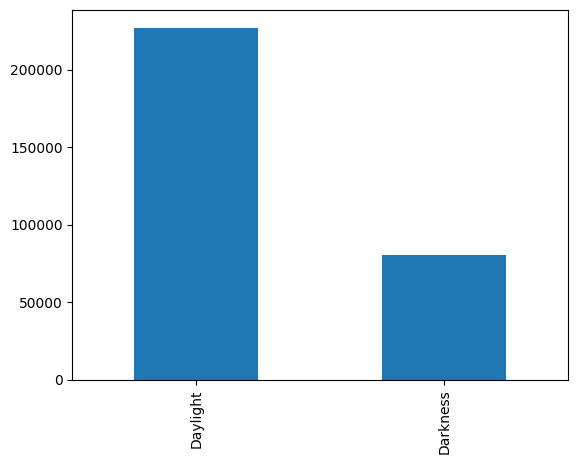

In [28]:
df["Light_Conditions"].value_counts().plot(kind= "bar")

<Axes: ylabel='Density'>

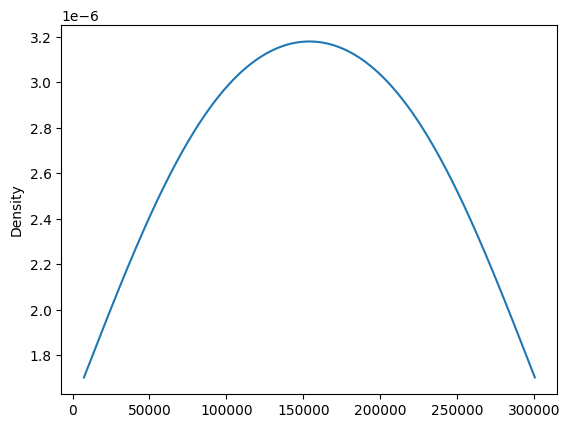

In [29]:
df["Light_Conditions"].value_counts().plot(kind= "kde")

In [30]:
df["Light_Conditions"].value_counts().values

array([227286,  80687], dtype=int64)

## CONCLUSION :- 
- More no.of accidents (227286) happens in daylight condition
- Distribution seems like a normal distribution  


In [31]:
df["Road_Surface_Conditions"].value_counts()

Dry                     208967
Wet or damp              81796
Frost or ice             12078
Snow                      4758
Flood over 3cm. deep       374
Name: Road_Surface_Conditions, dtype: int64

In [32]:
# Make Wet or damp and Flood over 3cm. deep as a single road surface condition as -----------> Wet
# Make Snow & Frost or ice  as a single road surface condition as --------------> Snow
# Dry  ----------> Dry

In [33]:
df["Road_Surface_Conditions"] = df["Road_Surface_Conditions"].str.replace("Wet or damp","Wet").str.replace("Flood over 3cm. deep" ,"Wet").str.replace("Frost or ice" ,"Snow")

C:\Users\Mayur Dalvi\AppData\Local\Temp\ipykernel_11400\1892511075.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df["Road_Surface_Conditions"] = df["Road_Surface_Conditions"].str.replace("Wet or damp","Wet").str.replace("Flood over 3cm. deep" ,"Wet").str.replace("Frost or ice" ,"Snow")


In [34]:
df["Road_Surface_Conditions"].value_counts()

Dry     208967
Wet      82170
Snow     16836
Name: Road_Surface_Conditions, dtype: int64

<Axes: >

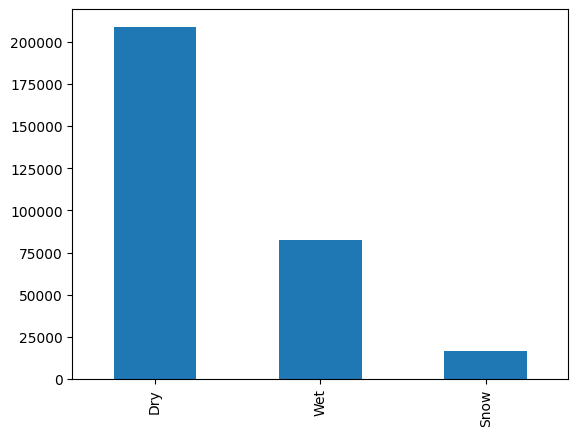

In [35]:
df["Road_Surface_Conditions"].value_counts().plot(kind = "bar")

<Axes: ylabel='Density'>

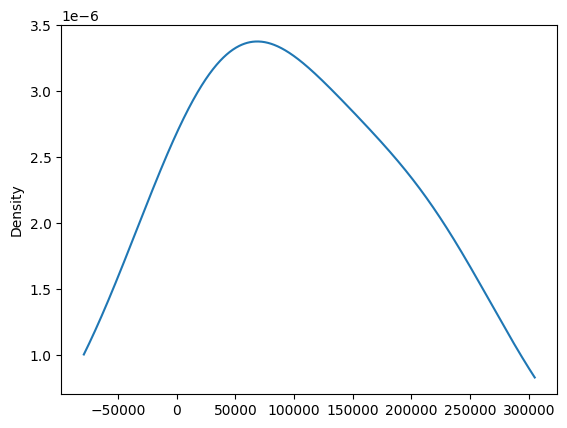

In [36]:
df["Road_Surface_Conditions"].value_counts().plot(kind = "kde")

In [37]:
df["Road_Surface_Conditions"].value_counts().values

array([208967,  82170,  16836], dtype=int64)

In [38]:
s = pd.Series([208967,  82170,  16836])
s.skew()

0.9022345131474744

## CONCLUSION :- 
- More no.of accidents (208967) happens in Dry Road surface conditions
- normal distribution is there 

In [39]:
df["Weather_Conditions"].value_counts()

Fine no high winds       244496
Raining no high winds     37841
Other                      8802
Snowing no high winds      4839
Fog or mist                4783
Raining + high winds       3526
Fine + high winds          3148
Snowing + high winds        538
Name: Weather_Conditions, dtype: int64

In [40]:
# Make Fine no high winds and Fine + high winds as a single road surface condition as -----------> Fine
# Raining no high winds & Raining + high winds -----------------> Rainy
# Snowing no high winds & Snowing + high winds $ Fog or mist ------------------> Snow
# Other  ----------> Other

In [41]:
df["Weather_Conditions"] = df["Weather_Conditions"].str.replace('Fine no high winds' ,"Normal").str.replace('Fine + high winds' ,"Normal")

C:\Users\Mayur Dalvi\AppData\Local\Temp\ipykernel_11400\3956629372.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df["Weather_Conditions"] = df["Weather_Conditions"].str.replace('Fine no high winds' ,"Normal").str.replace('Fine + high winds' ,"Normal")


In [42]:
df["Weather_Conditions"].value_counts().index

Index(['Normal', 'Raining no high winds', 'Other', 'Snowing no high winds',
       'Fog or mist', 'Raining + high winds', 'Fine + high winds',
       'Snowing + high winds'],
      dtype='object')

In [43]:
df["Weather_Conditions"] = df["Weather_Conditions"].str.replace('Raining no high winds' ,"Rainy").str.replace('Raining + high winds' ,"Fine")

C:\Users\Mayur Dalvi\AppData\Local\Temp\ipykernel_11400\1046736437.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df["Weather_Conditions"] = df["Weather_Conditions"].str.replace('Raining no high winds' ,"Rainy").str.replace('Raining + high winds' ,"Fine")


In [44]:
df["Weather_Conditions"].value_counts()

Normal                   244496
Rainy                     37841
Other                      8802
Snowing no high winds      4839
Fog or mist                4783
Raining + high winds       3526
Fine + high winds          3148
Snowing + high winds        538
Name: Weather_Conditions, dtype: int64

In [45]:
df["Weather_Conditions"] = df["Weather_Conditions"].str.replace('Snowing no high winds' ,"Snow/Fog").str.replace('Snowing + high winds' ,"Snow/Fog").str.replace('Fog or mist' ,"Snow/Fog")

C:\Users\Mayur Dalvi\AppData\Local\Temp\ipykernel_11400\4163240256.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df["Weather_Conditions"] = df["Weather_Conditions"].str.replace('Snowing no high winds' ,"Snow/Fog").str.replace('Snowing + high winds' ,"Snow/Fog").str.replace('Fog or mist' ,"Snow/Fog")


In [46]:
df["Weather_Conditions"].value_counts()

Normal                  244496
Rainy                    37841
Snow/Fog                  9622
Other                     8802
Raining + high winds      3526
Fine + high winds         3148
Snowing + high winds       538
Name: Weather_Conditions, dtype: int64

In [47]:
temp_df = df[df["Weather_Conditions"] =="Raining + high winds"]

In [48]:
df.loc[temp_df.index ,"Weather_Conditions" ] = "Rainy"

In [49]:
temp_df = df[df["Weather_Conditions"] =="Fine + high winds"]
df.loc[temp_df.index ,"Weather_Conditions" ] = "Normal"

In [50]:
temp_df = df[df["Weather_Conditions"] =="Snowing + high winds"]
df.loc[temp_df.index ,"Weather_Conditions" ] = "Snow/Fog"

In [51]:
df["Weather_Conditions"].value_counts()

Normal      247644
Rainy        41367
Snow/Fog     10160
Other         8802
Name: Weather_Conditions, dtype: int64

<Axes: >

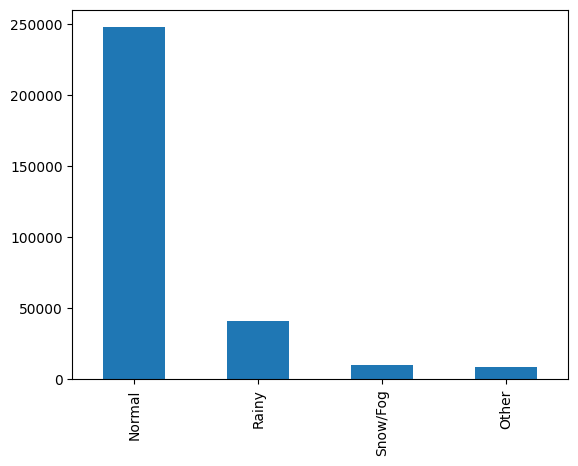

In [52]:
df["Weather_Conditions"].value_counts().plot(kind="bar")

<Axes: ylabel='Density'>

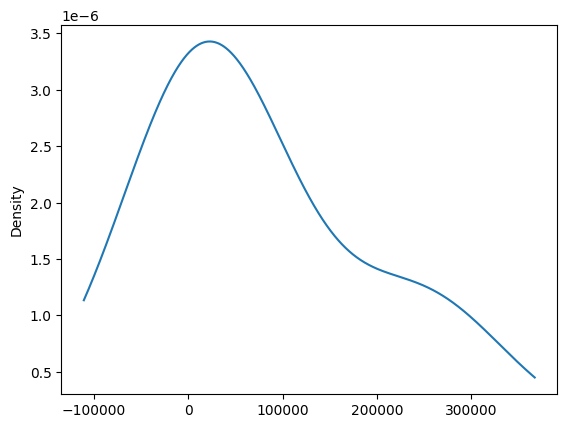

In [53]:
df["Weather_Conditions"].value_counts().plot(kind="kde")

In [54]:
df["Weather_Conditions"].value_counts().values

array([247644,  41367,  10160,   8802], dtype=int64)

In [55]:
s = pd.Series([247644,  41367,  10160,   8802])
s.skew()

1.9007528695722167

## CONCLUSION :- 
- More no.of accidents (247644) happens in normal Conditions 
- distribution is positively skewed) 

In [56]:
df.columns

Index(['Month_No', 'Month_Name', 'Year', 'Day_of_Week', 'Junction_Detail',
       'Accident_Severity', 'Latitude', 'Light_Conditions',
       'Local_Authority_(District)', 'Longitude', 'Number_of_Casualties',
       'Road_Surface_Conditions', 'Road_Type', 'Time', 'Urban_or_Rural_Area',
       'Weather_Conditions', 'Vehicle_Type'],
      dtype='object')

### Columns name which are contributing Factors in our dataset
- Accident_Severity
- Number_of_Casualties
- Number_of_Vehicles
- Speed_limit
- Time
- Urban_or_Rural_Area
- Vehicle_Type


In [57]:
df["Vehicle_Type"].value_counts()

Car                                      239794
Van / Goods 3.5 tonnes mgw or under       15695
Motorcycle over 500cc                     11226
Bus or coach (17 or more pass seats)       8686
Motorcycle 125cc and under                 6852
Goods 7.5 tonnes mgw and over              6532
Taxi/Private hire car                      5543
Motorcycle 50cc and under                  3703
Motorcycle over 125cc and up to 500cc      3285
Other vehicle                              2516
Goods over 3.5t. and under 7.5t            2502
Minibus (8 - 16 passenger seats)            821
Agricultural vehicle                        749
Pedal cycle                                  66
Ridden horse                                  3
Name: Vehicle_Type, dtype: int64

In [58]:
# Motorcycle over 500cc & Motorcycle 125cc and under & Motorcycle 50cc and under & Motorcycle over 125cc and up to 500cc & Pedal cycle ---------------> Bike
# Agricultural vehicle -------> Agricultural 
# Bus or coach (17 or more pass seats) & Minibus (8 - 16 passenger seats) ----------> Bus
# Car & Taxi/Private hire car ------------> Car
# Van / Goods 3.5 tonnes mgw or under & Goods 7.5 tonnes mgw and over & Goods over 3.5t. and under 7.5t --------> Van

In [59]:
df["Vehicle_Type"] = df["Vehicle_Type"].str.replace("Motorcycle over 500cc" ,"Bike").str.replace("Motorcycle 125cc and under" ,"Bike").str.replace("Motorcycle 50cc and under" ,"Bike").str.replace("Motorcycle over 125cc and up to 500cc" ,"Bike").str.replace("Pedal cycle" ,"Bike")

In [60]:
df["Vehicle_Type"] = df["Vehicle_Type"].str.replace("Agricultural vehicle" ,"Agricultural")

In [61]:
temp_df = df[df["Vehicle_Type"] =="Bus or coach (17 or more pass seats)"]
df.loc[temp_df.index , "Vehicle_Type"] = "Bus"

In [62]:
temp_df = df[df["Vehicle_Type"] =="Minibus (8 - 16 passenger seats)"]
df.loc[temp_df.index , "Vehicle_Type"] = "Bus"

In [63]:
df["Vehicle_Type"] = df["Vehicle_Type"].str.replace("Taxi/Private hire car" ,"Car")

In [64]:
df["Vehicle_Type"] = df["Vehicle_Type"].str.replace("Van / Goods 3.5 tonnes mgw or under" ,"Van").str.replace("Goods 7.5 tonnes mgw and over" ,"Van").str.replace("Goods over 3.5t. and under 7.5t" ,"Van")

C:\Users\Mayur Dalvi\AppData\Local\Temp\ipykernel_11400\114064441.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df["Vehicle_Type"] = df["Vehicle_Type"].str.replace("Van / Goods 3.5 tonnes mgw or under" ,"Van").str.replace("Goods 7.5 tonnes mgw and over" ,"Van").str.replace("Goods over 3.5t. and under 7.5t" ,"Van")


In [65]:
df["Vehicle_Type"] = df["Vehicle_Type"].str.replace("Other vehicle" ,"Other").str.replace("Ridden horse" ,"Other")

In [66]:
df["Vehicle_Type"].value_counts()

Car             245337
Bike             25132
Van              24729
Bus               9507
Other             2519
Agricultural       749
Name: Vehicle_Type, dtype: int64

### Performing EDA on this columns by using user defined function 

C:\Users\Mayur Dalvi\AppData\Local\Temp\ipykernel_11400\3554368018.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], order=df[column].value_counts().index, palette="viridis")  # Use seaborn countplot for better aesthetics


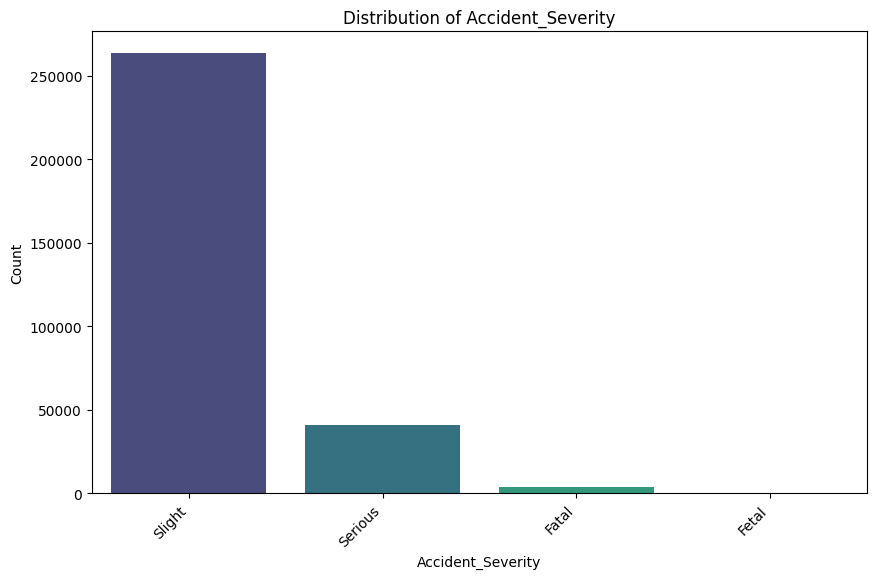

C:\Users\Mayur Dalvi\AppData\Local\Temp\ipykernel_11400\3554368018.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], order=df[column].value_counts().index, palette="viridis")  # Use seaborn countplot for better aesthetics


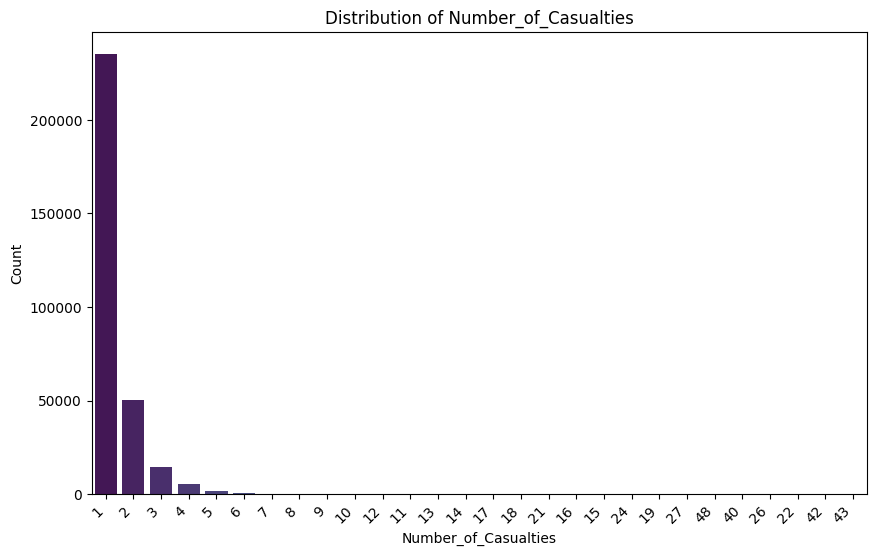

C:\Users\Mayur Dalvi\AppData\Local\Temp\ipykernel_11400\3554368018.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], order=df[column].value_counts().index, palette="viridis")  # Use seaborn countplot for better aesthetics


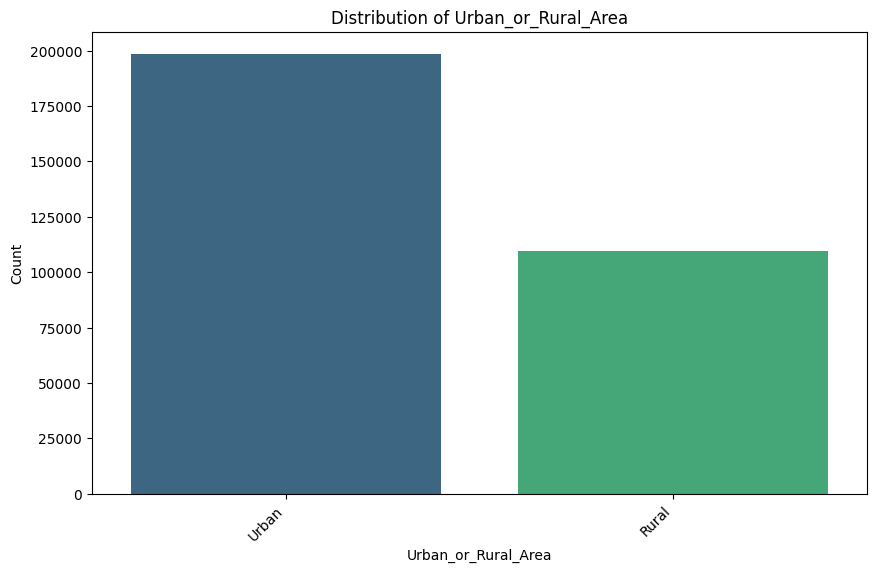

C:\Users\Mayur Dalvi\AppData\Local\Temp\ipykernel_11400\3554368018.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], order=df[column].value_counts().index, palette="viridis")  # Use seaborn countplot for better aesthetics


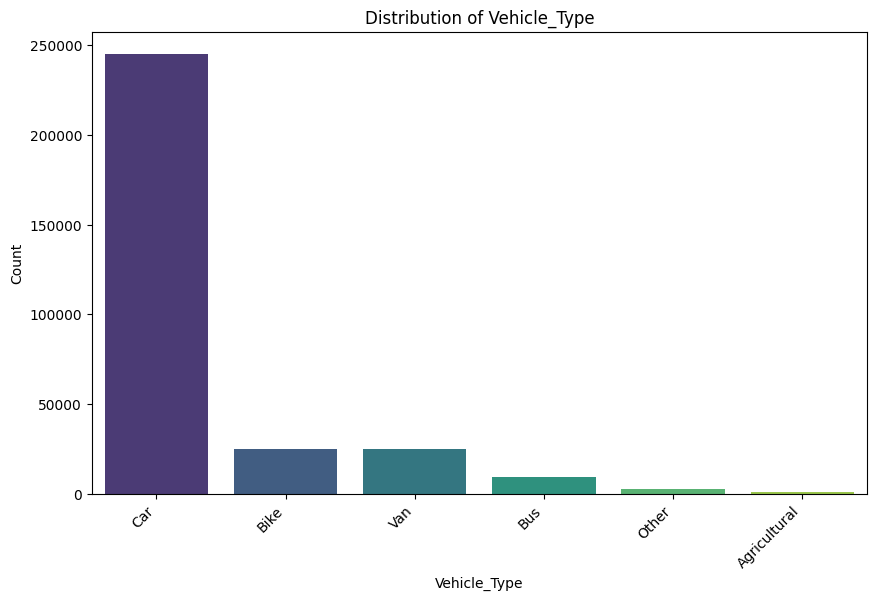

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

def Perform_EDA(column):
    plt.figure(figsize=(10, 6))
    sns.countplot(x=df[column], order=df[column].value_counts().index, palette="viridis")  # Use seaborn countplot for better aesthetics
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.show()

col_list = ["Accident_Severity",
            "Number_of_Casualties",
            "Urban_or_Rural_Area",
            "Vehicle_Type"]

for column in col_list:
    Perform_EDA(column)


In [68]:
df['Accident_Severity'].value_counts()

Slight     263280
Serious     40740
Fatal        3904
Fetal          49
Name: Accident_Severity, dtype: int64

In [69]:
df["Accident_Severity"] = df["Accident_Severity"].str.replace("Fetal" ,"Fatal")

In [70]:
df.head()

,Month_No,Month_Name,Year,Day_of_Week,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Longitude,Number_of_Casualties,Road_Surface_Conditions,Road_Type,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,1,Jan,2021,Thursday,T or staggered junction,Serious,51.512273,Daylight,Kensington and Chelsea,-0.201349,1,Dry,One way street,15:11:00,Urban,Normal,Car
1,1,Jan,2021,Monday,Crossroads,Serious,51.514399,Daylight,Kensington and Chelsea,-0.199248,11,Wet,Single carriageway,10:59:00,Urban,Normal,Car
2,1,Jan,2021,Sunday,T or staggered junction,Slight,51.486668,Daylight,Kensington and Chelsea,-0.179599,1,Dry,Single carriageway,14:19:00,Urban,Normal,Car
3,1,Jan,2021,Monday,T or staggered junction,Serious,51.507804,Daylight,Kensington and Chelsea,-0.203110,1,Snow,Single carriageway,08:10:00,Urban,Other,Bike
4,1,Jan,2021,Tuesday,Crossroads,Serious,51.482076,Darkness,Kensington and Chelsea,-0.173445,1,Dry,Single carriageway,17:25:00,Urban,Normal,Car


# Dealing with missing values ''

In [71]:
df.isnull().sum()

Month_No                       0
Month_Name                     0
Year                           0
Day_of_Week                    0
Junction_Detail                0
Accident_Severity              0
Latitude                       0
Light_Conditions               0
Local_Authority_(District)     0
Longitude                      0
Number_of_Casualties           0
Road_Surface_Conditions        0
Road_Type                      0
Time                          17
Urban_or_Rural_Area            0
Weather_Conditions             0
Vehicle_Type                   0
dtype: int64

In [72]:
temp_df = df[df["Time"].isnull()]

In [73]:
pd.set_option("display.max_columns" ,None)
pd.set_option("display.max_rows" ,None)

In [74]:
df.groupby("Day_of_Week")["Time"].value_counts().loc["Sunday"]

Time
13:00:00    301
15:00:00    283
14:00:00    275
12:30:00    271
16:00:00    258
13:30:00    256
16:30:00    255
12:00:00    253
17:00:00    244
15:30:00    237
14:30:00    234
17:30:00    234
18:00:00    227
11:30:00    204
11:00:00    202
18:30:00    196
19:00:00    193
10:30:00    166
14:45:00    164
19:30:00    162
10:00:00    152
20:00:00    151
15:45:00    150
17:45:00    149
14:50:00    146
13:45:00    145
14:15:00    144
11:50:00    142
12:15:00    142
12:45:00    142
11:45:00    140
13:40:00    140
15:20:00    139
13:50:00    135
16:20:00    135
16:45:00    135
12:20:00    134
17:20:00    134
13:20:00    132
15:50:00    132
14:40:00    131
01:00:00    129
12:50:00    129
14:10:00    129
13:15:00    127
21:00:00    127
13:10:00    126
15:15:00    126
16:40:00    126
20:30:00    125
21:30:00    125
17:15:00    124
18:15:00    124
12:40:00    123
16:15:00    120
16:50:00    119
17:50:00    119
16:10:00    117
18:50:00    117
00:30:00    116
10:45:00    116
22:00:00    116
11:

In [75]:
'''tuesday and wednesday = 08:30:00
Friday = 15:30:00
MOnday = 15:30:00
Thursday = 17:30:00
Saturday = 13:00:00
sun =  13:00:00 '''

'tuesday and wednesday = 08:30:00\nFriday = 15:30:00\nMOnday = 15:30:00\nThursday = 17:30:00\nSaturday = 13:00:00\nsun =  13:00:00 '

In [76]:
def fill_missing_time(df):
    # Create a copy of the DataFrame to avoid modifying the original data
    df_filled = df.copy()

    # Identify rows with missing values in the "Time" column
    missing_time_rows = df_filled[df_filled["Time"].isnull()]

    # Iterate through each missing time row and fill with the most frequent time for the corresponding day
    for index, row in missing_time_rows.iterrows():
        day_of_week = row["Day_of_Week"]
        most_frequent_time = df_filled[df_filled["Day_of_Week"] == day_of_week]["Time"].value_counts().idxmax()
        df_filled.at[index, "Time"] = most_frequent_time

    return df_filled

# Call the function to fill missing values in the "Time" column
df_filled = fill_missing_time(df)


In [77]:
df["Time"].isnull().sum()

17

In [78]:
df["Time"].fillna("17:00:00" , inplace=True)

In [79]:
df["Time"].isnull().sum()

0

In [80]:
df.shape

(307973, 17)

In [81]:
df.sample(20)

,Month_No,Month_Name,Year,Day_of_Week,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Longitude,Number_of_Casualties,Road_Surface_Conditions,Road_Type,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
26966,4,Apr,2021,Monday,Not at junction or within 20 metres,Serious,53.767449,Daylight,South Ribble,-2.600289,4,Dry,Single carriageway,19:55:00,Rural,Normal,Car
118862,10,Oct,2021,Saturday,Not at junction or within 20 metres,Serious,51.315750,Daylight,Guildford,-0.457589,3,Dry,Slip road,13:23:00,Rural,Normal,Car
48200,1,Jan,2021,Tuesday,Not at junction or within 20 metres,Slight,53.992097,Darkness,Harrogate,-1.528354,1,Wet,One way street,08:15:00,Urban,Normal,Car
159542,5,May,2021,Wednesday,Roundabout,Slight,55.917934,Daylight,East Dunbartonshire,-4.149576,1,Dry,Roundabout,09:00:00,Urban,Normal,Car
216555,9,Sep,2022,Wednesday,Not at junction or within 20 metres,Slight,53.829253,Daylight,Bradford,-1.953626,3,Dry,Single carriageway,17:33:00,Rural,Normal,Car
306644,11,Nov,2022,Thursday,T or staggered junction,Slight,51.832492,Darkness,Carmarthenshire,-4.290006,1,Wet,Single carriageway,16:14:00,Rural,Other,Car
307532,9,Sep,2022,Tuesday,Not at junction or within 20 metres,Slight,52.506185,Daylight,Powys,-3.334380,1,Wet,Single carriageway,07:09:00,Urban,Normal,Car
289234,3,Mar,2022,Monday,Crossroads,Slight,51.081156,Daylight,North Devon,-4.054803,1,Wet,Single carriageway,06:31:00,Urban,Normal,Car
293079,5,May,2022,Friday,Not at junction or within 20 metres,Slight,51.013225,Daylight,Taunton Deane,-3.125425,1,Dry,Single carriageway,07:00:00,Urban,Normal,Car
201494,7,Jul,2022,Monday,Roundabout,Slight,53.525399,Daylight,Oldham,-2.117625,3,Dry,Single carriageway,20:30:00,Urban,Normal,Bike


In [82]:
df.to_csv("RTA_Cleaned_Dataset_3Lack_rows.csv" , index=False)